Tratamento do Dataset

In [1]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [2]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [19]:
data.isnull().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type            147
engine                 0
transmission           0
ext_col                0
int_col                0
accident              89
clean_title          467
price                  0
Potencia             629
Capacidade_Motor     187
Numero_Cilindros     356
Numero_Valvulas     2812
dtype: int64

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].value_counts() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
data['ext_col'].value_counts()# 11 -> nao se sabe
data['int_col'].value_counts() # 98 -> nao se sabe
for preco in data['price']: # tudo certo
    if not isinstance(preco, int):
        print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [3]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

[1, 2, 4, 5, 6, 7, 8, 9, 10]

#### verificar significado de '-' e NaN para o tipo de combustível

In [4]:
len(data.loc[data['fuel_type'] == '–'])

38

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [3]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
399,Kia,EV6 Wind,2022,11945,NaN,111.2Ah / FR 70kW / RR 160kW (697V),Automatic,Glacier,Black,None reported,NaN,38998
1311,Ford,Mustang Mach-E Select,2023,923,NaN,Standard Range Battery,Automatic,Rapid Red Metallic Tinted Clearcoat,Black Onyx,None reported,NaN,46998
1552,Tesla,Model Y Long Range,2022,4665,NaN,Dual Motor - Standard,Automatic,Silver,Black,None reported,NaN,46598
2622,Tesla,Model Y Long Range,2022,9411,NaN,Dual Motor - Standard,Automatic,Silver,Black,None reported,NaN,47998


###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [4]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [7]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

2812

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [24]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [23]:
#sorted(data['Potencia'].unique())

###### verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [8]:
data.loc[data['brand'] == 'Maybach'].head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
1600,Maybach,Type 57 Base,2004,34254,Gasoline,543.0HP 5.5L 12 Cylinder Engine Gasoline Fuel,5-Speed A/T,Brown,–,None reported,Yes,64250,543.0,5.5,12.0,NaN


In [11]:
data.to_csv('train_ccols.csv', index=False)

# Subsets com DATASET W/ ENGINE caract-

In [4]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [54]:
p.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas'],
      dtype='object')

In [45]:
print(p.duplicated().sum())

0


# SUBSET 1 

##### Substituição de valores nulos e - pela moda
##### Substituição de valores nulos da coluna Fuel_type por Eletric
##### Mantém colunas adicionais (Potencia, Capacidade_Motor, Numero_Cilindros, Numero_Valvulas)
##### Transformação da variável Transmission em numérica
##### Normalização dos dados numéricos e logaritimização

In [67]:
data1 = p

In [85]:
data1.describe()

,model_year,milage,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
count,3207.000000,3207.000000,3.207000e+03,2578.000000,3020.000000,2851.000000,395.000000
mean,2015.517930,64594.983785,4.487024e+04,333.120248,3.698079,6.222729,21.716456
std,6.131963,52387.260707,8.382969e+04,121.663739,1.420807,1.703615,7.640435
min,1974.000000,100.000000,2.000000e+03,70.000000,0.650000,3.000000,12.000000
25%,2012.000000,23151.500000,1.705000e+04,248.000000,2.500000,4.000000,16.000000
50%,2017.000000,52253.000000,3.169800e+04,311.000000,3.500000,6.000000,24.000000
75%,2020.000000,93450.000000,4.999650e+04,400.000000,4.700000,8.000000,24.000000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000,12.000000,64.000000


In [33]:
data1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2,outlier
0,Jeep,Wrangler Sport,0.80,0.175105,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,0.006775,0.226316,0.380645,0.333333,0.186855,0.444444,1
1,Toyota,Highlander XLE,0.82,0.169116,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,0.008130,0.210526,0.367742,0.333333,0.186855,0.666667,1
2,Toyota,Camry Hybrid XLE,0.88,0.171749,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,0.007451,0.145263,0.238710,0.111111,0.186855,0.666667,1
3,Subaru,Outback Touring XT,0.94,0.082490,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,0.010840,0.200000,0.225806,0.111111,0.186855,0.666667,1
4,Lexus,GX 460 Base,0.88,0.184984,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,0.012227,0.243158,0.509677,0.555556,0.186855,0.555556,1


### NULL's substitution

#### ENGINE clone

In [68]:
m = data1['Numero_Valvulas'].mean()
m2 = data1['Numero_Cilindros'].mean()
m3 = data1['Potencia'].mean()
m4 = data1['Capacidade_Motor'].mean()

data1['Numero_Valvulas'].fillna(m, inplace=True)
data1['Numero_Cilindros'].fillna(m2, inplace=True)
data1['Potencia'].fillna(m3, inplace=True)
data1['Capacidade_Motor'].fillna(m4, inplace=True)

#### FUEL TYPE + Engine + Ex_col + Int_col + Accident + Transmission

In [69]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]
data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
#data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod4=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod4)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission']=data1['transmission'].replace('–', mod7)

#### clean title

In [70]:
data1['clean_title'] = data1['clean_title'].fillna('No')

#### TRANSMISSION SEP 

In [71]:
# import numpy as np
data1['T2'] = data1['transmission'].str.extract(r'(\d+)')
data1['T2'] = pd.to_numeric(data1['T2'], errors='coerce')
m5 = data1['T2'].mean() # ja nao precisa
data1['T2'].fillna(round(m5), inplace=True) # arredondar para cima # ja nao precisa
data1.head()
# 1478 nulls

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,outlier,T2
0,Jeep,Wrangler Sport,0.80,0.175105,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,0.006775,0.226316,0.380645,0.333333,0.230769,1,5.0
1,Toyota,Highlander XLE,0.82,0.169116,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,0.008130,0.210526,0.367742,0.333333,0.230769,1,7.0
2,Toyota,Camry Hybrid XLE,0.88,0.171749,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,0.007451,0.145263,0.238710,0.111111,0.230769,1,7.0
3,Subaru,Outback Touring XT,0.94,0.082490,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,0.010840,0.200000,0.225806,0.111111,0.230769,1,7.0
4,Lexus,GX 460 Base,0.88,0.184984,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,0.012227,0.243158,0.509677,0.555556,0.230769,1,6.0


In [72]:
len(data1['T2'].unique()) # 9
# len(data['fuel_type'].unique()) # 7
# len(data['Numero_Cilindros'].unique()) # 8
# len(data['Potencia'].unique()) # 324
# len(data['Numero_Valvulas'].unique()) # 9
# len(data['Capacidade_Motor'].unique()) # 61

9

### NORMALIZAÇÃO

In [73]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the features
data1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2','milage']] = scaler.fit_transform(data1[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']])




In [74]:
import numpy as np

# Apply logarithmic transformation to skewed features
skewed_features = ['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'milage']  # Specify the skewed features here
data1[skewed_features] = np.log1p(data1[skewed_features])
data1.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,outlier,T2
0,Jeep,Wrangler Sport,0.587787,0.161357,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,0.006752,0.204014,0.322551,0.287682,0.207639,1,0.367725


### Outliers - LOF

In [75]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data1.select_dtypes(include=[np.number])

In [76]:
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data1['outlier'] = y_pred

In [77]:
out = data1[data1['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data1[data1['outlier'] == -1].index
o=(data1.loc[outlier_indices]).head()
o.describe() # dados outliers

,model_year,milage,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,outlier,T2
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000
mean,0.603533,0.128424,0.048547,0.231926,0.368161,0.457142,0.294887,-1.0,0.217238
std,0.068931,0.142146,0.077509,0.101749,0.240826,0.178425,0.138947,0.0,0.298339
min,0.494696,0.007524,0.002199,0.100083,0.000000,0.287682,0.207639,-1.0,0.000000
25%,0.598837,0.018317,0.004394,0.221036,0.313161,0.287682,0.207639,-1.0,0.000000
50%,0.609766,0.062004,0.009876,0.226087,0.359252,0.441833,0.207639,-1.0,0.000000
75%,0.631272,0.224989,0.042088,0.226087,0.584196,0.575364,0.325422,-1.0,0.510826
max,0.683097,0.329284,0.184178,0.386336,0.584196,0.693147,0.526093,-1.0,0.575364


In [78]:
(p.drop(outlier_indices)).describe() # dados sem os outliers

,model_year,milage,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,outlier,T2
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.0,3046.000000
mean,0.601692,0.143572,0.012920,0.237818,0.322346,0.295184,0.201176,1.0,0.500433
std,0.069281,0.104951,0.013081,0.087530,0.121388,0.127654,0.033874,0.0,0.101131
min,0.307485,0.000000,0.000000,0.006296,0.092373,0.000000,0.000000,1.0,0.000000
25%,0.565314,0.057088,0.005068,0.189315,0.234690,0.287682,0.207639,1.0,0.441833
50%,0.620576,0.124155,0.009927,0.226087,0.313161,0.287682,0.207639,1.0,0.510826
75%,0.652325,0.209389,0.015796,0.286365,0.411896,0.441833,0.207639,1.0,0.510826
max,0.693147,0.685710,0.153518,0.693147,0.693147,0.693147,0.325422,1.0,0.693147


In [79]:
criteria = data1['outlier'] == -1
clean_data = data1[~criteria] # datarfame sem outliers
clean_data.columns
ck = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
ck.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,T2
0,Jeep,Wrangler Sport,0.587787,0.161357,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,0.006752,0.204014,0.322551,0.287682,0.207639,0.367725
1,Toyota,Highlander XLE,0.598837,0.156248,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,0.008097,0.191055,0.313161,0.287682,0.207639,0.510826
2,Toyota,Camry Hybrid XLE,0.631272,0.158497,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,0.007423,0.135634,0.214070,0.105361,0.207639,0.510826
3,Subaru,Outback Touring XT,0.662688,0.079263,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,0.010781,0.182322,0.203599,0.105361,0.207639,0.510826
4,Lexus,GX 460 Base,0.631272,0.169729,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,0.012153,0.217655,0.411896,0.441833,0.207639,0.441833


### BOXPLOT OUTLIERS

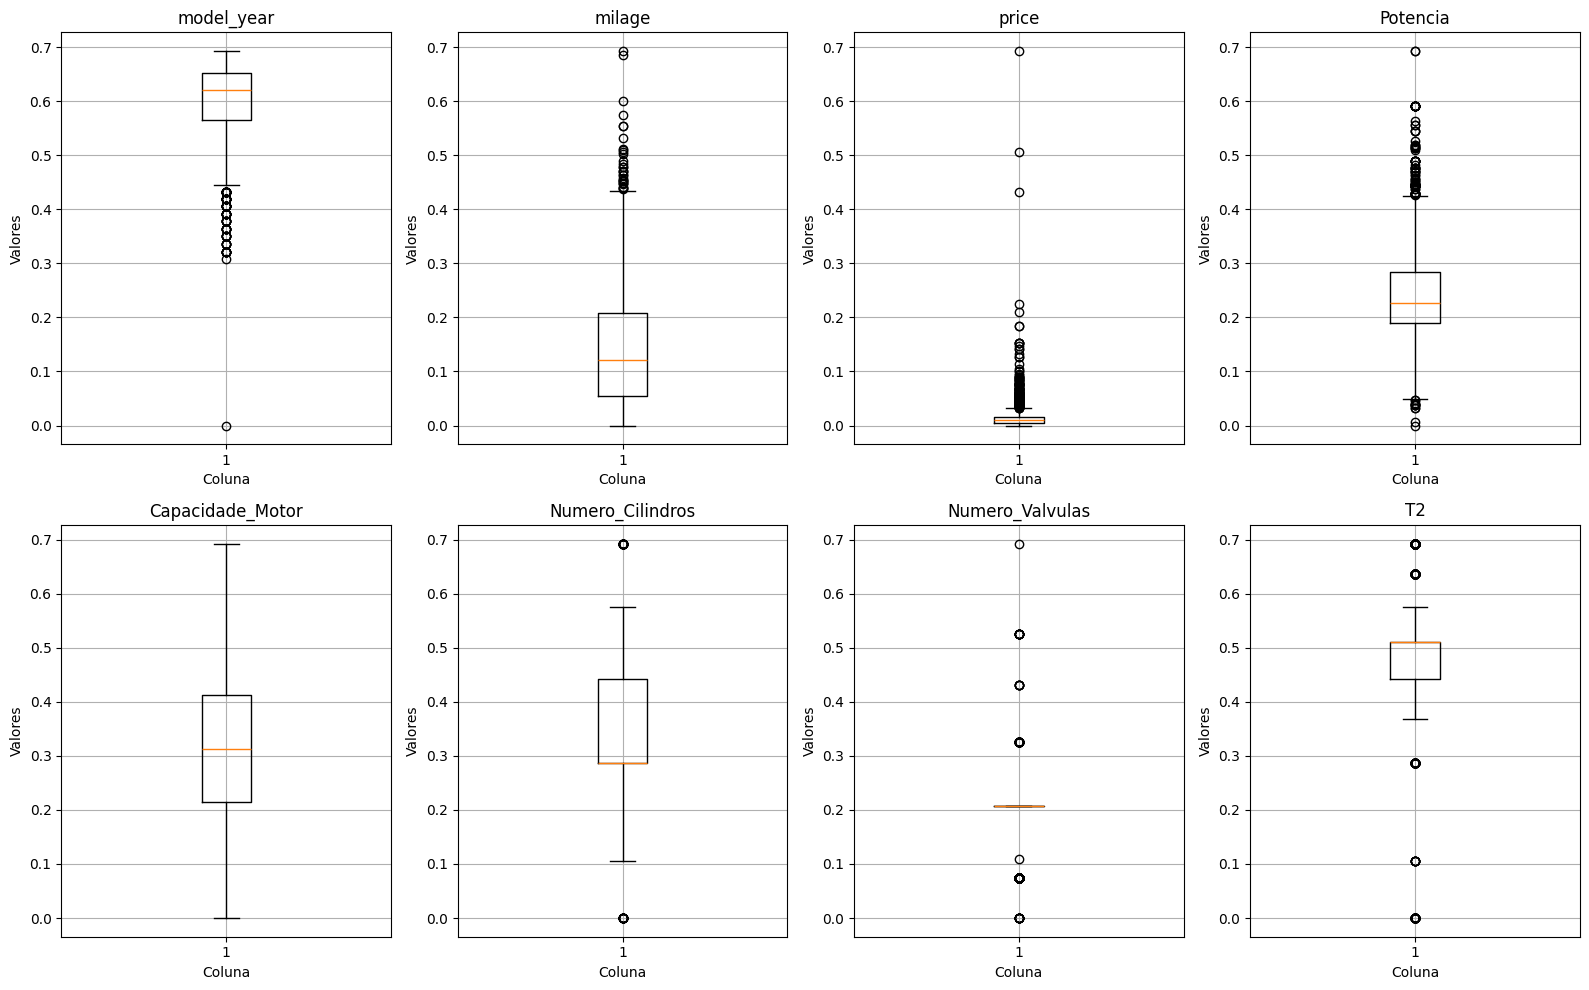

In [80]:
woo = data1.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
import numpy as np
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
colunas_numericas = woo.select_dtypes(include=np.number)

# Definir o número de colunas e linhas para os subplots
num_linhas = 2
num_colunas = 4
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(16, 10))

# Iterar sobre os atributos numéricos e plotar os boxplots em subplots
for i, coluna in enumerate(colunas_numericas.columns):
    linha = i // num_colunas
    coluna_atual = i % num_colunas
    axs[linha, coluna_atual].boxplot(colunas_numericas[coluna])
    axs[linha, coluna_atual].set_title(f'{coluna}')
    axs[linha, coluna_atual].set_xlabel('Coluna')
    axs[linha, coluna_atual].set_ylabel('Valores')
    axs[linha, coluna_atual].grid(True)

# Ajustar o layout dos subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Subset 2

##### Susbtituir valores nulos e - por desconhecido
##### Substituição de valores nulos da coluna Fuel_type por Eletric
#### Mantém colunas adicionais (Potencia, Capacidade_Motor, Numero_Cilindros, Numero_Valvulas)
#### Remoção de Outliers por LOF
#### Criação de uma variavel Classificação para os preços

In [14]:
data2=p

### NULL's substitution

### Fuel_type

In [15]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### ENGINE clone

In [16]:
m = data2['Numero_Valvulas'].median()
m2 = data2['Numero_Cilindros'].median()
m3 = data2['Potencia'].median()
m4 = data2['Capacidade_Motor'].median()

data2['Numero_Valvulas'].fillna(m, inplace=True)
data2['Numero_Cilindros'].fillna(m2, inplace=True)
data2['Potencia'].fillna(m3, inplace=True)
data2['Capacidade_Motor'].fillna(m4, inplace=True)

#### Accident + engine + transmission + ex_col + int_col

In [17]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Clean Title

In [18]:
data2['clean_title'] = data2['clean_title'].fillna('No')

In [68]:
data2.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
Potencia            0
Capacidade_Motor    0
Numero_Cilindros    0
Numero_Valvulas     0
T2                  0
outlier             0
dtype: int64

### Normalização

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# # Define the scaler
# scaler = MinMaxScaler()

# # Fit the scaler on the data and transform the features
# data2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'milage']] = scaler.fit_transform(data2[['price', 'model_year', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas' ,'milage']])


### Remoção de Ouliers - LOF

In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

nums = data2.select_dtypes(include=[np.number])
lof = LocalOutlierFactor(n_neighbors=20, novelty=False, contamination=0.05)
y_pred = lof.fit_predict(nums)
data2['outlier'] = y_pred
out = data2[data2['outlier']==-1]
# len(out) # 161 outliers
out.describe()

outlier_indices = data2[data2['outlier'] == -1].index
o=(data2.loc[outlier_indices]).head()
o.describe() # dados outliers
criteria = data2['outlier'] == -1
clean_data = data2[~criteria] # datarfame sem outliers
clean_data.columns
ck2 = clean_data.drop(['outlier'], axis=1) # nova variável para fazer o modelo sem os outliers
ck2.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas
0,Jeep,Wrangler Sport,2014,71000,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000,285.0,3.6,6.0,24.0
1,Toyota,Highlander XLE,2015,68575,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,270.0,3.5,6.0,24.0
2,Toyota,Camry Hybrid XLE,2018,69641,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,208.0,2.5,4.0,24.0
3,Subaru,Outback Touring XT,2021,33500,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000,260.0,2.4,4.0,24.0
4,Lexus,GX 460 Base,2018,75000,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,301.0,4.6,8.0,24.0


### Nova Categoria para os precos

In [20]:
min_value = ck2['price'].min() #0.0
max_value = ck2['price'].max() # 0.25336347250399127
import numpy as np
bins = np.linspace(min_value,max_value,6) # ecônomico, médio-baixo, médio, médio-alto, alto 
bins

array([  2000. ,  57598.2, 113196.4, 168794.6, 224392.8, 279991. ])

In [21]:
labels = ['ecônomico','médio-baixo','médio','médio-alto','alto']

In [22]:
ck2['Classificação_Preco'] = pd.cut(ck2['price'], bins=bins, labels=labels, include_lowest=True)
ck2.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Potencia,Capacidade_Motor,Numero_Cilindros,Numero_Valvulas,Classificação_Preco
0,Jeep,Wrangler Sport,2014,71000,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000,285.0,3.6,6.0,24.0,ecônomico
1,Toyota,Highlander XLE,2015,68575,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000,270.0,3.5,6.0,24.0,ecônomico
2,Toyota,Camry Hybrid XLE,2018,69641,Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995,208.0,2.5,4.0,24.0,ecônomico
3,Subaru,Outback Touring XT,2021,33500,Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000,260.0,2.4,4.0,24.0,ecônomico
4,Lexus,GX 460 Base,2018,75000,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095,301.0,4.6,8.0,24.0,ecônomico


(array([2486.,    0.,    0.,    0.,    0.,  435.,    0.,    0.,    0.,
           0.,   69.,    0.,    0.,    0.,    0.,   34.,    0.,    0.,
           0.,   22.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

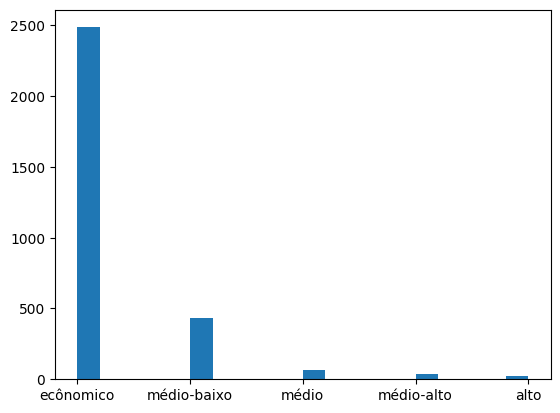

In [23]:
import matplotlib.pyplot as plt
plt.hist(ck2['Classificação_Preco'], bins=20)

In [24]:
ck2['Classificação_Preco'].value_counts()

Classificação_Preco
ecônomico      2486
médio-baixo     435
médio            69
médio-alto       34
alto             22
Name: count, dtype: int64

## Regressão Linear 1

preço ~ engine atbs + transmission atbs (T2) + fuel_type + model_year (price e milage mesma faixa de valores; novos atributos mesma faixa de valores; ano) -- NORMALIZAR ?

### Separar Data / Treinar e Avaliar Algoritmos

In [81]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
# from slickml.metrics import (
#     RegressionMetrics,
# )  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
# import shap

In [82]:
# X = data.drop(['price'], axis=1)  # Features
# y = data['price'] 
ck1=ck.loc[:, ['model_year', 
#'fuel_type', 
'price', 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
X = ck1.drop(['price'], axis=1)  # sem os outliers 
y = ck1['price'] 

In [83]:
# X = pd.get_dummies(X, drop_first=True) # para var. categóricas
# Option 1: Fill missing values, for example with the median or mean
# X.fillna(X.median(), inplace=True)

# Option 2: Drop rows with missing values
# X.dropna(inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [85]:
# Make predictions
y_pred = model.predict(X_test)


In [86]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 8.364417825496148e-05
Mean Absolute Error: 0.00565123662632537
R-squared: 0.32855620147858844


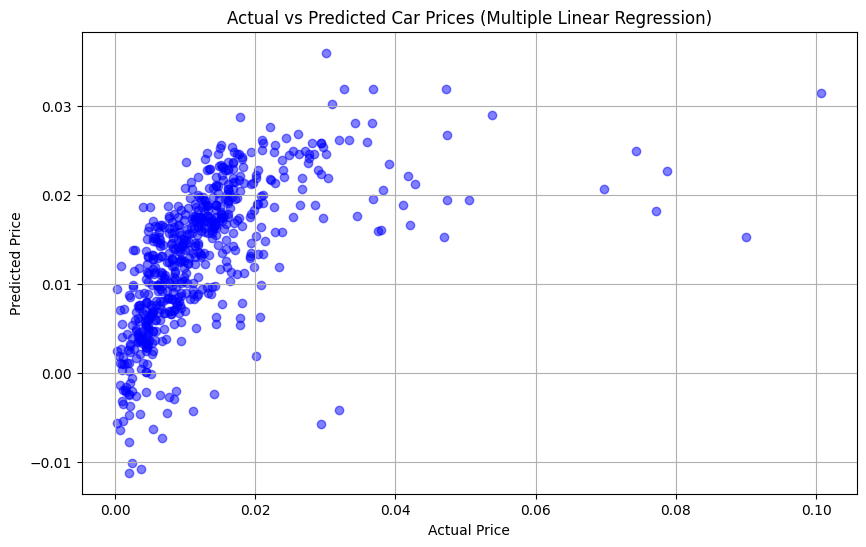

In [87]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Car Prices (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


#### RANDOM FOREST

In [88]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

In [89]:
# Regression metrics for Random Forest
from slickml.metrics import RegressionMetrics

reg_metrics = RegressionMetrics(y_test, pred)
reg_metrics.plot()

ModuleNotFoundError: No module named 'slickml'

# CORRELATION

In [ ]:
import seaborn as sns

dados_numericos = data.select_dtypes(include=['number'])
correlation_matrix = dados_numericos.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# preço está bastante correlacionado com potência e ano de fábrico

correlação p/ preço/nº valvulas diminui muito quando se substitui NaN (0.51 para 0.11)

# Regressão Linear 2

preço ~ milage + clean_title + accident

#### ACCIDENT

In [ ]:
ac_m = data['accident'].mode()[0]
data['accident'].fillna(ac_m, inplace=True)
data['accident'].unique()

#### CLEAN TITLE

In [ ]:
data['clean_title'].fillna('No', inplace=True)
data['clean_title'].unique()

#### CORES

In [ ]:
def simplify_color(color):
    return color.split()[0]

# Aplicar a função à coluna 'Cor'
p['simp_int_col'] = p['int_col'].apply(simplify_color)
p['simp_ext_col'] = p['ext_col'].apply(simplify_color) # de 265 p/ 191
# n vale a pena

# AD -> Subset 2 -sem normalização

### Dividir o dataset em treino e teste

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)   # downloaded from https://github.com/slickml/slick-ml
from matplotlib import pyplot as plt
#import shap

ModuleNotFoundError: No module named 'xgboost'

In [27]:
X = ck2.drop(['price'], axis=1)  # sem os outliers 
y = ck2['price'] 


### Coverter categorico -> Numerico

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Crie uma instância do codificador com handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Ajuste e transforme todas as variáveis categóricas no conjunto de dados completo
X_encoded = encoder.fit_transform(X)


In [29]:
# Divida os dados transformados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_tr_encoded, X_ts_encoded, y_tr, y_ts = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [30]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
DT.fit(X_tr_encoded, y_tr)
pred3 = DT.predict(X_ts_encoded)

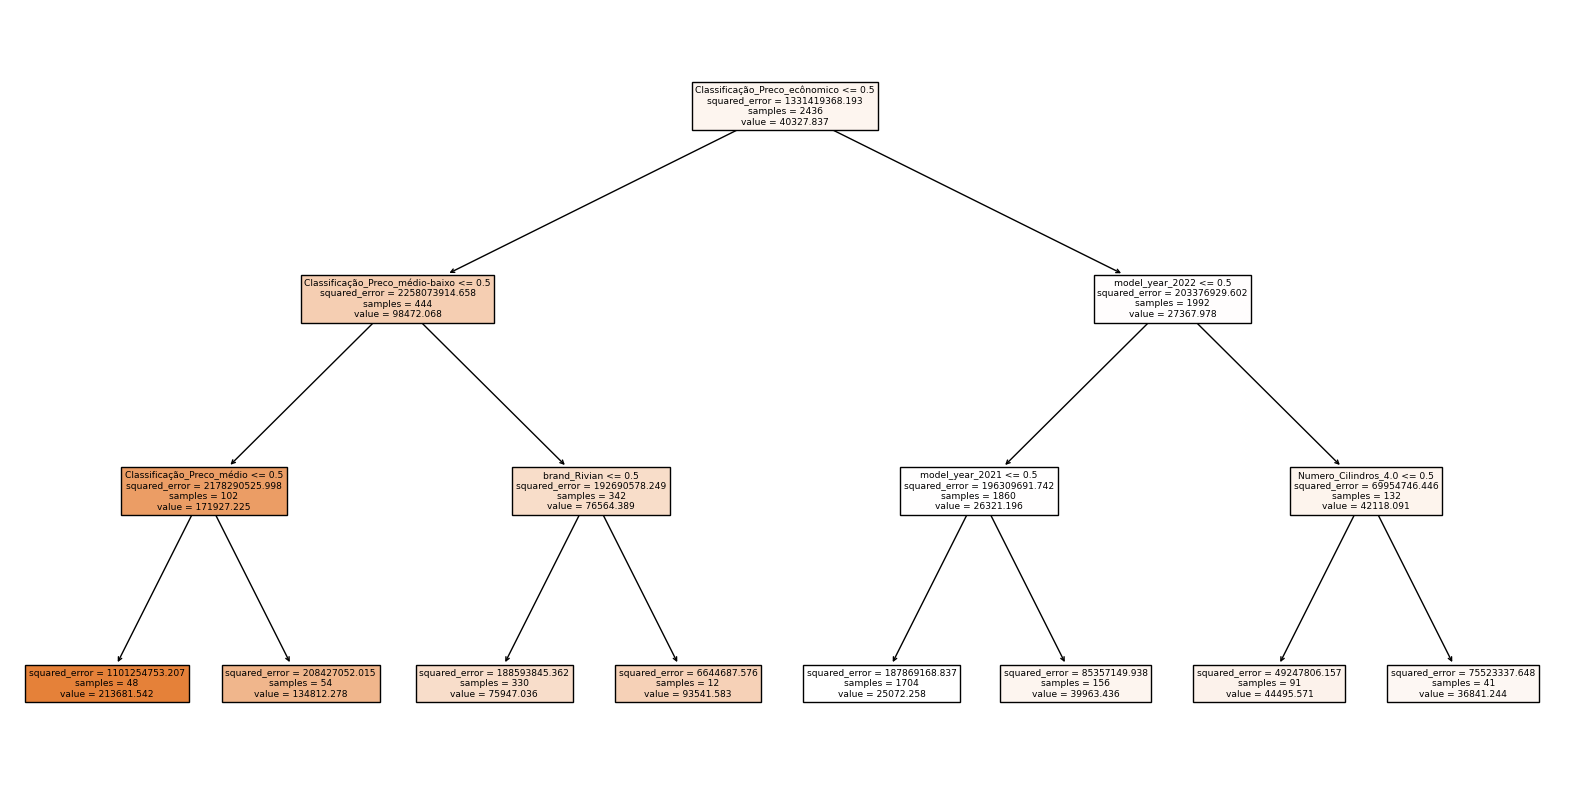

In [31]:
plt.figure(figsize=(20,10))
tree.plot_tree(DT, filled=True, feature_names=encoder.get_feature_names_out())
plt.show()

In [35]:
# Regression metrics for Decision Tree
reg_metrics3 = RegressionMetrics(y_ts, pred3)
reg_metrics3.plot()

NameError: name 'RegressionMetrics' is not defined

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Calcular as predições
preds = DT.predict(X_ts_encoded)

# Calcular métricas de regressão
mse = mean_squared_error(y_ts, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_ts, preds)
mae = mean_absolute_error(y_ts, preds)
medae = median_absolute_error(y_ts, preds)

# Exibir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)
print("Erro Absoluto Médio (MAE):", mae)
print("Mediana do Erro Absoluto (MedAE):", medae)


Erro Quadrático Médio (MSE): 176875570.3111935
Raiz do Erro Quadrático Médio (RMSE): 13299.457519432644
Coeficiente de Determinação (R²): 0.852996255469789
Erro Absoluto Médio (MAE): 10896.226665121032
Mediana do Erro Absoluto (MedAE): 9875.24178403756
